## Ayudantía 12: Topicos Avanzados en Programación

### Ayudantes 👾
- Julio Huerta
- Felipe Vidal
- Diego Toledo
- Alejandro Held
- Clemente Campos

### 📖 Contenidos 📖
En esta ayudantía veremos los siguientes temas:
- Expresiones regulares
- Grafos y búsqueda en grafos
- Numpy y Pandas

### Expresiones Regulares

Para introducir el tema, pensemos en el típico problema de validar si una dirección de correo eléctronico es válida. Necesitamos que el correo sea alfanumérico, que contenga un "@" en un lugar específico, seguido de un dominio como "gmail.com", "outlook.com" o "uc.cl".

Para esto podríamos intentar verificar individualmente cada regla usando métodos de strings, como lo haríamos usualmente. Podríamos hacer un split en los caracteres "@" y ".", y verificar que cada una de las subcadenas cumpla con las reglas, pero ¿qué pasa si el string no incluye un "@" o un "."? Eso es un caso borde que no estamos considerando y que debemos manejar. En resumen, este acercamiento se puede volver tedioso y propenso a errores rápidamente.

Aquí es donde entran las expresiones regulares. Estas son secuencias de caracteres que definen un patrón de búsqueda, mediante reglas con las que el string deberá calzar. En Python, podemos utilizar el módulo `re` para trabajar con expresiones regulares.

In [2]:
import re

regex_email = "^[a-zA-Z0-9_]+@((gmail|outlook)\.com|uc\.cl)$"

def validar_email(email):
    return re.match(regex_email, email)

emails = [
    "hola@gmail.com",
    "felipe@uc.cl",
    "432768@outlook.com",
    "direccion_invalidagmail.com",
    "a.v.a.n.z.a.d.a@uc.cl",
    "max@outlook.cl",
    "holaaa@outlook.commmm",
    "t4p10c4_aj0l0t3@gmail.com"
]

for email in emails:
    if validar_email(email):
        print(f"{email} es un email válido")
    else:
        print(f"{email} no es un email válido")

hola@gmail.com es un email válido
felipe@uc.cl es un email válido
432768@outlook.com es un email válido
direccion_invalidagmail.com no es un email válido
a.v.a.n.z.a.d.a@uc.cl no es un email válido
max@outlook.cl no es un email válido
holaaa@outlook.commmm no es un email válido
t4p10c4_aj0l0t3@gmail.com es un email válido


Pero las expresiones regulares sirven para mucho más que validar strings. Podemos utilizarlas para buscar, reemplazar, dividir y extraer información de strings de manera muy eficiente. Por ejemplo, digamos que queremos separar un párrafo en oraciones. Esto puede hacerse usando una expresión regular y métodos del módulo `re`.

In [3]:
regex_separacion = r'(?<=[:.!?])\s+'
textos = [
    "Era ese llanto que sobreviene cuando uno se siente opacamente desgraciado. Cuando alguien se siente brillantemente desgraciado, entonces sí vale la pena llorar con acompañamiento de temblores, convulsiones, y, sobre todo, con público. Pero cuando, además de desgraciado, uno se siente opaco, cuando no queda sitio para la rebeldía, el sacrificio o la heroicidad, entonces hay que llorar sin ruido, porque nadie puede ayudar y porque uno tiene conciencia de que eso pasa y al final se retoma el equilibrio, la normalidad.",
    "Pensé en un mundo sin memoria, sin tiempo; consideré la posibilidad de un lenguaje que ignorara los sustantivos, un lenguaje de verbos impersonales y de indeclinables epítetos. Así fueron muriendo los días y con los días los años, pero algo parecido a la felicidad ocurrió una mañana. Llovió, con lentitud poderosa.",
    "The Savage interrupted him. But isn't it natural to feel there's a God? You might as well ask if it's natural to do up one's trousers with zippers, said the Controller sarcastically. You remind me of another of those old fellows called Bradley. He defined philosophy as the finding of bad reason for what one believes by instinct. As if one believed anything by instinct! One believes things because one has been conditioned to believe them. Finding bad reasons for what one believes for other bad reasons–that's philosophy. People believe in God because they've been conditioned to."
]

for texto in textos:
    oraciones = re.split(regex_separacion, texto)
    for oracion in oraciones:
        print(oracion)
        print()


Era ese llanto que sobreviene cuando uno se siente opacamente desgraciado.

Cuando alguien se siente brillantemente desgraciado, entonces sí vale la pena llorar con acompañamiento de temblores, convulsiones, y, sobre todo, con público.

Pero cuando, además de desgraciado, uno se siente opaco, cuando no queda sitio para la rebeldía, el sacrificio o la heroicidad, entonces hay que llorar sin ruido, porque nadie puede ayudar y porque uno tiene conciencia de que eso pasa y al final se retoma el equilibrio, la normalidad.

Pensé en un mundo sin memoria, sin tiempo; consideré la posibilidad de un lenguaje que ignorara los sustantivos, un lenguaje de verbos impersonales y de indeclinables epítetos.

Así fueron muriendo los días y con los días los años, pero algo parecido a la felicidad ocurrió una mañana.

Llovió, con lentitud poderosa.

The Savage interrupted him.

But isn't it natural to feel there's a God?

You might as well ask if it's natural to do up one's trousers with zippers, said th

También podemos usar Regex para buscar patrones en un texto. Por ejemplo, podemos intentar extraer todas las citas textuales de un texto.

In [4]:
regex_citas = r'\"(.*?)\"'

texto = """Dios mío, qué aburrimiento. Sólo entonces formuló la pregunta más lógica: "Che, ¿total te casaste con Isabel?"."Sí, y tengo tres hijos", contesté, acortando camino. Él tiene cinco. Qué suerte. "¿Y cómo está Isabel? ¿Siempre guapa?" "Murió", dije, poniendo la cara más inescrutable de mi repertorio. La palabra sonó como un disparo y él -menos mal- quedó desconcertado. Se apuró a terminar el tercer café y en seguida miró el reloj. Hay una especie de reflejo automático en eso de hablar de la muerte y mirar en seguida el reloj."""

citas = re.findall(regex_citas, texto)

for cita in citas:
    print(cita)
    print()

Che, ¿total te casaste con Isabel?

Sí, y tengo tres hijos

¿Y cómo está Isabel? ¿Siempre guapa?

Murió



### Grafos y búsqueda en grafos

Los grafos son estructuras de datos que consisten en un conjunto de nodos y aristas que los conectan, similares a las listas ligadas, pero con la diferencia de que los nodos pueden tener múltiples conexiones. En esta sección veremos cómo representar grafos en Python y cómo realizar búsquedas en ellos.

Los grafos pueden ser dirigidos o no dirigidos. En los grafos dirigidos, las aristas tienen una dirección, mientras que en los no dirigidos no la tienen. Esto se puede observar en la siguiente imagen:

![Direccion](imagenes/direccion.png)

Y los grafos pueden ser más simples:

![Simple](imagenes/simple.png)

O más complicados:

![Complicado](imagenes/complicado.png)

Para buscar dentro de grafos se utilizan dos algoritmos principales: DFS (Depth First Search) y BFS (Breadth First Search). DFS es un algoritmo que recorre el grafo en profundidad, es decir, recorre un camino hasta llegar al final y luego retrocede. BFS, en cambio, recorre el grafo en amplitud, es decir, recorre todos los nodos que están a la misma distancia del nodo inicial antes de avanzar a los nodos que están a una distancia mayor. Esto se puede observar mejor mediante gifs, como los presente a continuación:

#### DFS
![DFS](imagenes/dfs.gif)

#### BFS
![BFS](imagenes/bfs.gif)


Ahora vamos a ver un ejemplo de cómo se pueden realizar estas búsquedas en Python. En la carpeta de códigos de esta ayudantía se encuentra un archivo llamado `grafos.py` que contiene la implementación de un grafo y de los algoritmos de búsqueda DFS y BFS. Vamos a ver cómo se utilizan estos algoritmos, para lo que tendremos dos grafos distintos (uno añade un vérice a otro):


In [5]:
from codigos.grafos import Node, Graph
Node.id_counter = 0

# Ejemplo 1: Árbol sin ciclos
# Grafo de ejemplo:
#        A
#       / \
#      B   C
#     / \
#    D   E

a = Node("A")
b = Node("B")
c = Node("C")
d = Node("D")
e = Node("E")

graph = Graph()
graph.add_node(a)
graph.add_node(b)
graph.add_node(c)
graph.add_node(d)
graph.add_node(e)

graph.add_edge(a, b)
graph.add_edge(a, c)
graph.add_edge(b, d)
graph.add_edge(b, e)

print("DFS (árbol sin ciclo):")
graph.dfs(d)
print("\nBFS (árbol sin ciclo):")
graph.bfs(d)

# Ejemplo 2: Grafo con ciclos
# Añadimos un ciclo entre E y C
#        A
#       / \
#      B   C
#     / \ / 
#    D   E
graph.add_edge(e, c)

print("\nDFS (grafo con ciclo):")
graph.dfs(d)
print("\nBFS (grafo con ciclo):")
graph.bfs(d)


DFS (árbol sin ciclo):
Node 3: D
Node 1: B
Node 4: E
Node 0: A
Node 2: C

BFS (árbol sin ciclo):
Node 3: D
Node 1: B
Node 0: A
Node 4: E
Node 2: C

DFS (grafo con ciclo):
Node 3: D
Node 1: B
Node 4: E
Node 2: C
Node 0: A

BFS (grafo con ciclo):
Node 3: D
Node 1: B
Node 0: A
Node 4: E
Node 2: C


{Node 0: A, Node 1: B, Node 2: C, Node 3: D, Node 4: E}

### Numpy y Pandas

#### Numpy

Numpy es una librería de Python que permite trabajar con diversas operaciones matemáticas de manera eficiente. En particular, numpy permite trabajar con arreglos de manera eficiente, lo que es muy útil para realizar operaciones matriciales. 

Los arreglos son una estructura de datos que permite almacenar datos del mismo tipo de manera contigua en memoria. Se prefiere utilizar arreglos en lugar de listas de Python ya que los arreglos son más eficientes en términos de memoria y tiempo de ejecución, además de que numpy permite realizar operaciones matriciales y vectoriales de manera muy sencilla.

Típicamente numpy se importa como `np`, vamos a comparar la eficinencia entre listas de python y arreglos de numpy en distintas funcionalidades:

In [6]:
import numpy as np
import codigos.comparar_numpy as cnp

tamano = 1000000
lista_a = list(range(tamano))
lista_b = list(range(tamano))

array_a = np.array(lista_a)
array_b = np.array(lista_b)

print("Comparación de tiempo entre listas y arrays de numpy")

# Suma de listas y arrays
print("Tiempo suma de listas:", cnp.suma_de_listas(lista_a, lista_b))
print("Tiempo suma de arrays:", cnp.suma_de_arrays(array_a, array_b))

# Promedio de listas y arrays
print("Tiempo promedio de lista:", cnp.promedio_de_lista(lista_a))
print("Tiempo promedio de array:", cnp.promedio_de_array(array_a))

# Obtener elementos mayores a un valor en listas y arrays
valor = 500000
print("Tiempo obtener elementos mayores en lista:", cnp.obtener_elementos_mayores_a_lista(lista_a, valor))
print("Tiempo obtener elementos mayores en array:", cnp.obtener_elementos_mayores_a_array(array_a, valor))

Comparación de tiempo entre listas y arrays de numpy
Tiempo suma de listas: 0.08801960945129395
Tiempo suma de arrays: 0.0019996166229248047
Tiempo promedio de lista: 0.03699994087219238
Tiempo promedio de array: 0.002000093460083008
Tiempo obtener elementos mayores en lista: 0.061007022857666016
Tiempo obtener elementos mayores en array: 0.0010044574737548828


#### Pandas

Pandas es otra librería de Python que permite trabajar con datos de manera eficiente. Se basa en numpy y permite trabajar con estructuras de datos más complejas, como las series y los dataframes. Pandas permite manipular, limpiar y analizar datos de manera muy sencilla y se integra muy bien con otras librerías de Python, como numpy (ya que está construido sobre numpy) y matplotlib.

Los dataframes, estructuras de datos bidimensionales similares a hojas de excel o tablas de una base de datos, son la estructura de datos más utilizada en pandas. Los dataframes permiten almacenar datos de manera tabular y realizar operaciones sobre ellos con facilidad. Se puede obtener un "resumen" de los datos de un dataframe con el método `info()`, que nos entrega información sobre las columnas, los tipos de datos y la cantidad de datos no nulos. Asimismo se puede obtener los primeros X datos mediante el método `head(X)`. 

In [7]:
import pandas as pd

datos_mascotas = {
    'Nombre': ['Bobby', 'Luna', 'Max', 'Molly', 'Rocky'],
    'Raza': ['Labrador', 'Bulldog Francés', 'Pastor Alemán', 'Poodle', 'Golden Retriever'],
    'Año de Nacimiento': [2018, 2020, 2017, 2019, 2016],
    'Vacunación': ['Sí', 'No', 'Sí', 'Sí', 'No'],
    'Género': ['Macho', 'Hembra', 'Macho', 'Hembra', 'Macho']
}

df_mascotas = pd.DataFrame(datos_mascotas)
df_mascotas

,Nombre,Raza,Año de Nacimiento,Vacunación,Género
0,Bobby,Labrador,2018,Sí,Macho
1,Luna,Bulldog Francés,2020,No,Hembra
2,Max,Pastor Alemán,2017,Sí,Macho
3,Molly,Poodle,2019,Sí,Hembra
4,Rocky,Golden Retriever,2016,No,Macho


In [8]:
df_mascotas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Nombre             5 non-null      object
 1   Raza               5 non-null      object
 2   Año de Nacimiento  5 non-null      int64 
 3   Vacunación         5 non-null      object
 4   Género             5 non-null      object
dtypes: int64(1), object(4)
memory usage: 328.0+ bytes


In [9]:
df_mascotas.head(3)

,Nombre,Raza,Año de Nacimiento,Vacunación,Género
0,Bobby,Labrador,2018,Sí,Macho
1,Luna,Bulldog Francés,2020,No,Hembra
2,Max,Pastor Alemán,2017,Sí,Macho


Hay varias funcionalidades más para obtener información de los datos, que pueden encontrar en la documentación o en los contenidos del ramo.

Ahora nos centraremos en poder filtrar y seleccionar datos de un dataframe, además de poder modificar la estructura de los datos.

In [10]:
mascotas_vacunadas = df_mascotas[df_mascotas['Vacunación'] == 'Sí']
mascotas_vacunadas

,Nombre,Raza,Año de Nacimiento,Vacunación,Género
0,Bobby,Labrador,2018,Sí,Macho
2,Max,Pastor Alemán,2017,Sí,Macho
3,Molly,Poodle,2019,Sí,Hembra


In [11]:
nueva_mascota = {
    'Nombre': 'Toby',
    'Raza': 'Beagle',
    'Año de Nacimiento': 2021,
    'Vacunación': 'No',
    'Género': 'Macho'
}
df_nueva_mascota = pd.DataFrame(nueva_mascota, index=[0])
df_mascotas = pd.concat([df_mascotas, df_nueva_mascota], ignore_index=True)
df_mascotas

,Nombre,Raza,Año de Nacimiento,Vacunación,Género
0,Bobby,Labrador,2018,Sí,Macho
1,Luna,Bulldog Francés,2020,No,Hembra
2,Max,Pastor Alemán,2017,Sí,Macho
3,Molly,Poodle,2019,Sí,Hembra
4,Rocky,Golden Retriever,2016,No,Macho
5,Toby,Beagle,2021,No,Macho


In [12]:
df_mascotas['Junior'] = df_mascotas['Año de Nacimiento'] > 2018
df_mascotas

,Nombre,Raza,Año de Nacimiento,Vacunación,Género,Junior
0,Bobby,Labrador,2018,Sí,Macho,False
1,Luna,Bulldog Francés,2020,No,Hembra,True
2,Max,Pastor Alemán,2017,Sí,Macho,False
3,Molly,Poodle,2019,Sí,Hembra,True
4,Rocky,Golden Retriever,2016,No,Macho,False
5,Toby,Beagle,2021,No,Macho,True


Ya que los dataframes nos permiten trabajar con tablas de datos de forma cómoda, estos se usan mucho en el análisis y ciencia de datos. Podemos cargar datos desde un CSV, procesarlos y visualizarlos para entender mejor la información que contienen. 

Ahora, cargaremos un [*dataset* del top 100 de películas según rating en IMDb](https://www.kaggle.com/datasets/mayurkadam9833/top-100-imdb-movies), y crearemos un gráfico para visualizar el rating promedio de las películas por género, para descubrir si hay géneros generalmente más exitosos que otros, y por cuánto. Para crear el gráfico, utilizaremos la librería `matplotlib`.

In [13]:
from os import path

df = pd.read_csv(path.join('codigos', 'datos.csv'))
df

,rank,title,description,genre,rating,year
0,18,Spider-Man: Across the Spider-Verse,"Miles Morales catapults across the Multiverse,...",Animation;Action;Adventure,8.7,2023
1,32,Oppenheimer,"The story of American scientist, J. Robert Opp...",Biography;Drama;History,8.6,2023
2,77,Joker,A mentally troubled stand-up comedian embarks ...,Crime;Drama;Thriller,8.4,2019
3,76,Avengers: Endgame,After the devastating events of Avengers: Infi...,Action;Adventure;Drama,8.4,2019
4,37,Parasite,Greed and class discrimination threaten the ne...,Drama;Thriller,8.5,2019
...,...,...,...,...,...,...
95,99,Citizen Kane,Following the death of publishing tycoon Charl...,Drama;Mystery,8.3,1941
96,65,The Great Dictator,Dictator Adenoid Hynkel tries to expand his em...,Comedy;Drama;War,8.4,1940
97,49,Modern Times,The Tramp struggles to live in modern industri...,Comedy;Drama;Romance,8.5,1936
98,54,City Lights,"With the aid of a wealthy erratic tippler, a d...",Comedy;Drama;Romance,8.5,1931


In [14]:
# Ya que "genre" son múltiples géneros separados por ";", los separamos en listas
df['genre'] = df['genre'].str.split(';')
# Esto crea una fila duplicada por cada género en la lista
df_exploded = df.explode('genre')

# Obtenemos el promedio de rating por género
ratings_by_genre = df_exploded.groupby('genre')['rating'].mean()
print(ratings_by_genre)

genre
Action       8.573913
Adventure    8.514815
Animation    8.436364
Biography    8.537500
Comedy       8.425000
Crime        8.615000
Drama        8.545714
Family       8.533333
Fantasy      8.533333
Film-Noir    8.400000
History      8.633333
Horror       8.466667
Music        8.466667
Musical      8.300000
Mystery      8.442857
Romance      8.477778
Sci-Fi       8.509091
Thriller     8.436364
War          8.433333
Western      8.600000
Name: rating, dtype: float64


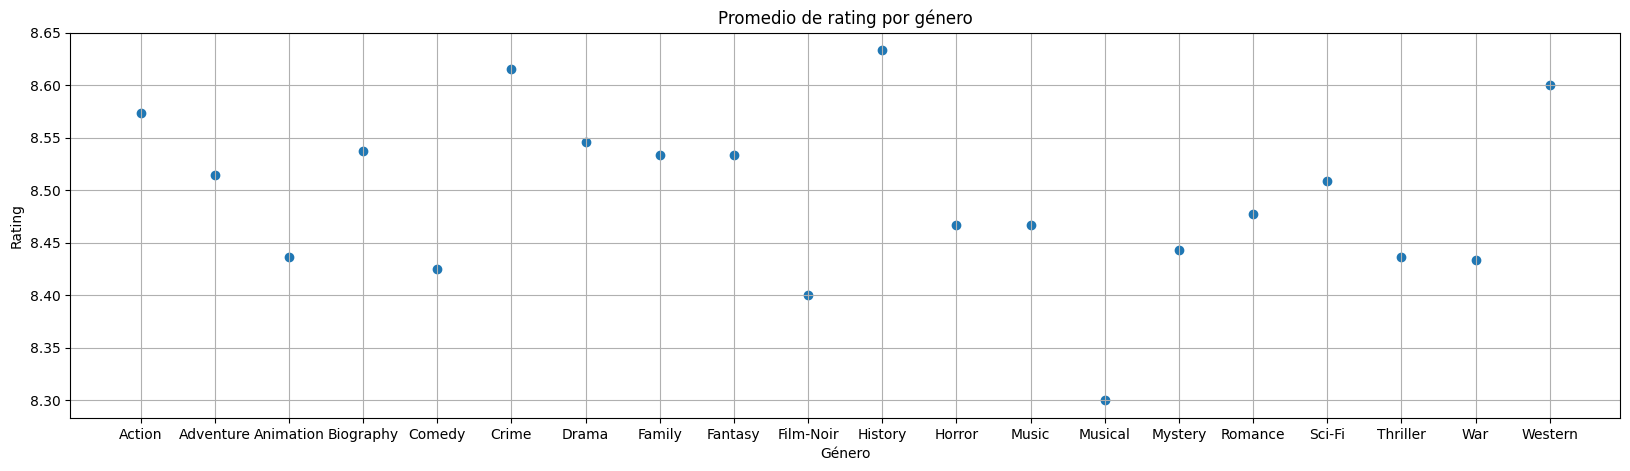

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))
plt.scatter(ratings_by_genre.index, ratings_by_genre)
plt.title('Promedio de rating por género')
plt.xlabel('Género')
plt.ylabel('Rating')
plt.grid()
plt.show()
